# INFS7410 Project - Part 2

_version 1.0_

### Preamble

The due date for this assignment is **21 October 2022 16:00 Eastern Australia Standard Time**.

This part of the project is worth 20% of the overall mark for INFS7410 (part 1 + part 2 = 40%). A detailed marking sheet for this assignment is provided alongside this notebook. The project is to be completed individually. 

We recommend that you make an early start on this assignment and proceed by steps. There are several activities you may have already tackled, including setting up the pipeline, manipulating the queries, implement some retrieval functions, and performing evaluation and analysis. Most of the assignment relies on knowledge and code you should have already have experienced in the computer practicals; however, there are some hidden challenges here and there that you may require some time to solve.

### Aim

Project aim: The aim of this project is for you to implement several neural information retrieval methods, evaluate them and compare them in the context of a multi-stage ranking pipeline.

The speficic objectives of Part 2 is to:

* Setup your infrastructure to index the collection and evaluate queries.
* Implement neural information retrieval models (only inference).
* Implement multi-stage ranking pipelines, i.e., BM25 + neural rankers.

### The Information Retrieval Task: Web Passage Ranking

As in part 1 of the project, in part 2 we will consider the problem of open-domain passage ranking in answer to web queries. In this context, users pose queries to the search engine and expect answers in the form of a ranked list of passages (maximum 1000 passages to be retrieved). 

The provided queries are actual queries submitted to the Microsoft Bing search engine. There are approximately 8.8 million passages in the collection, and the goal is to rank them based on their relevance to the queries.


### What we provide you with:

#### Files from practical

* A collection of 8.8 million text passages extracted from web pages (`collection.tsv`— provided in Week 1).
* A query file that contains 43 queries for you to perform retrieval experiments (`queries.tsv`— provided in Week 2).
* A qrel file containing relevance judgements to tune your methods (`qrels.txt`— provided in Week 2).
* Pytorch model files for ANCE.

#### Extra files for this project

* A leaderboard system for you to evaluate how well your system performs.
* A test query file that contains 54 queries for you to generate run files to submit to the leaderboard (`test_queries.tsv`).
* This jupyter notebook, which you will include inside it your implementation and report.
* An hdf5 file that contains TILDEv2 pre-computed terms weights for the collection. Download from this [link](https://drive.google.com/file/d/199IO4E2ThiyLkMWokfr3Y9JY3DWSoFLt/view?usp=sharing)

Put this notebook and provided files under the same directory.

#### What you need to produce

You need to produce:

* Correct implementations of the methods required by this project specifications.
* An explanation of the retrieval methods used, including the formulas that represent the models you implemented and code that implements that formula, an explanation of the evaluation settings followed, and a discussion of the findings. Please refer to the marking sheet to understand how each of these requirements are graded.

You are required to produce both of these within this jupyter notebook.

#### Required methods to implement

In Part 2 of the project, you are required to implement the following retrieval methods. All implementations should be based on your code (except for BM25, where you can use the Pyserini built-in SimpleSearcher).

1. Dense Retriever (ANCE): Use ANCE to re-rank BM25 top-k documents. See the practical in Week 10 for background information.
2. TILDEv2: Use TILDEv2 to re-rank BM25 top-k documents. See the practical in Week 10 for background information.
3. Three-stage ranking pipeline: Use TILDEv2 to re-rank BM25 top-k documents, then use monoBERT to re-rank TILDEv2 top-k documents. See the practical in Week 9 and Week 10 for background information.

You can choose an arbitrary number for the choice of cut-off k, but you need to be aware that these neural models are slow to perform inference on the CPU, where a large k might be infeasible. You are free to use Colab, but make sure you copy your code in this notebook.

For TILDEv2, unlike what you did in practical, we offer you the pre-computed term weights for the whole collection (for more details, see the `Initial packages and functions` cell). This means you can have a fast re-ranking speed for TILDEv2. Use this advantage to trade-off effectiveness and efficiency for your three-stage ranking pipeline implementation.

You should have already attempted many of these implementations above as part of the computer pracs exercises.

#### Required evaluation to perform

In Part 2 of the project, you are required to perform the following evaluation:

1. For all methods, report effectiveness using `queries.tsv` and `qrels.txt` and submit your runs on the `test_queries.tsv` using the parameter values you selected from the `queries.tsv` to the leaderboard system. 
2. Report every method's effectiveness and efficiency (average query latency) on the `queries.tsv` and the corresponding cut-off k into a table. Perform statistical significance analysis across the results of the methods and report them in the tables.
3. Produce a gain-loss plot that compares the most and least effective of the three required methods above in terms of nDCG@10 on `queries.csv`.
4. Comment on trends and differences observed when comparing your findings. Is there a method that consistently outperforms the others on the `queries.tsv` and the `test_queries.tsv`?

Regarding evaluation measures, evaluate the retrieval methods with respect to nDCG at 10 (`ndcg_cut_10`). You should use this measure as the target measure for tuning. Also compute reciprocal rank at 1000 (`recip_rank`),  MAP (`map`) and Recall at 1000 (`recall_1000`).

For all statistical significance analyses, use a paired t-test and distinguish between p<0.05 and p<0.01.

#### How to submit

You will have to submit one file:

1. A zip file containing this notebook (.ipynb) and this notebook **as a PDF document**. The code should be able to be executed by us. Remember to include all your discussion and analysis also in this notebook and not as a separate file.

It needs to be submitted via the relevant Turnitin link in the INFS7410 BlackBoard site by **28 October 2021, 16:00 Eastern Australia Standard Time**, unless you have been given an extension (according to UQ policy), *before* the due date of the assignment.

## Initial packages and functions
----
Unlike prac week 10 which we compute contextualized term weights with TILDEv2 in an "on-the-fly" manner. In this project, we provide an hdf5 file that contains pre-computed term weights for all the passages in the collection. 

Frist, pip install the h5py library:

In [1]:
!pip install h5py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 9.8 MB/s eta 0:00:00ta 0:00:01


The following cell gives you an example of how to use the file to access token weights and their corresponding token ids given a document id.

In [11]:
import h5py
from transformers import BertTokenizer
f = h5py.File("tildev2_weights.hdf5", 'r')
weights_file = f['documents'][:]  # load the hdf5 file to the memory.

docid = 1
token_weights, token_ids = weights_file[docid]

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
for token_id, weight in zip(token_ids.tolist(), token_weights):
    print(f"{tokenizer.decode([token_id])}: {weight}")

manhattan: 9.7734375
project: 6.32421875
atomic: 9.3125
bomb: 7.69921875
helped: 5.2890625
bring: 2.90234375
end: 3.68359375
world: 3.294921875
war: 4.55078125
ii: 3.6015625
legacy: 5.71875
peaceful: 7.265625
uses: 4.515625
atomic: 8.625
energy: 6.45703125
continues: 3.02734375
impact: 4.8515625
history: 2.693359375
science: 2.69140625
effects: 4.15625
purpose: 3.408203125
effect: 3.537109375
quiz: 3.48828125
work: 2.486328125
use: 2.951171875
nuclear: 5.4296875
created: 2.849609375
used: 3.169921875
power: 2.072265625
help: 2.4921875
us: 1.5283203125
weapons: 2.478515625
take: 0.5615234375


Note, these token_ids include stopwords' ids, remember to remove stopwords' ids for query tokens.

----------

In [115]:
# Import all your python libraries and put setup code here.
from pyserini.search import SimpleSearcher
from pyserini.analysis import Analyzer, get_lucene_analyzer
from datetime import datetime
from tqdm import tqdm
import pandas as pd
import pytrec_eval
import numpy as np
from modeling import TILDEv2
from transformers import AutoTokenizer
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import pytrec_eval
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np


# ANCE
from modeling import AnceModel
from transformers import AutoTokenizer
device = 'cpu'
ance_model = AnceModel.from_pretrained('ANCE_Model').eval()
ance_model.to(device)
ance_tokenizer = AutoTokenizer.from_pretrained('ANCE_Model')

def ance_encode(text, device='cpu'):
    # get query inputs
    inputs = ance_tokenizer(
            [text],
            max_length=64,
            padding='longest',
            truncation=True,
            add_special_tokens=True,
            return_tensors='pt'
        )
    # pass query inputs to device and to model
    # use 'cuda:0' if you are using GPU
    inputs.to(device)
    # compute query embeddings
    embeddings = ance_model(inputs["input_ids"]).detach().cpu().numpy().flatten()
    return embeddings

# Tildev2
model = TILDEv2.from_pretrained("tildev2-noexp").eval()
tokenizer = AutoTokenizer.from_pretrained("tildev2-noexp")
f = h5py.File("tildev2_weights.hdf5", 'r')
weights_file = f['documents'][:]  # load the hdf5 file to the memory.
stop_ids = model.get_stop_ids(tokenizer)

def tildev2_scoreing(query, document,weights_file,docid):
    # get document term weights
    inputs = tokenizer(document, return_tensors='pt')
    token_weights, token_ids = weights_file[docid]
    token_ids = np.array(token_ids)
    token_weights = np.array(token_weights)
    
    # get query token ids
    query_ids = tokenizer(query, add_special_tokens=False)["input_ids"]
    query_ids = [tok_id for tok_id in query_ids if tok_id not in stop_ids]  # remove stopwords for query
    
    # use query token ids to match term weights in the document
    token_idx = [np.where(token_ids == tok_id) for tok_id in query_ids]
    score = 0
    for idx in token_idx:
        if len(idx[0]) != 0:
            score += np.max(token_weights[idx])  # if a query term appears multiple times in the passage, use the max socre
    return score

# monoBERT
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

monoBERT = AutoModelForSequenceClassification.from_pretrained('castorini/monobert-large-msmarco', cache_dir="./cache")
tokenizer = AutoTokenizer.from_pretrained('castorini/monobert-large-msmarco', cache_dir="./cache")

def monoBERT_score(query: str, passage: str):
    ret = tokenizer.encode_plus(query,
                                passage,
                                max_length=512,
                                truncation=True,
                                return_token_type_ids=True,
                                return_tensors='pt')
    input_ids = ret['input_ids'].to(DEVICE)
    tt_ids = ret['token_type_ids'].to(DEVICE)
    with torch.no_grad():
        output, = monoBERT(input_ids, token_type_ids=tt_ids, return_dict=False)
        score = torch.nn.functional.softmax(output, 1)[0, -1].cpu().item()

    return score

# Evaluate Performance
def print_results(run, qrel_file='qrel.txt', measures=["map", "ndcg_cut_10", "recall_1000","recip_rank"]):
    # Open the qrels file.
    with open(qrel_file, "r") as f:
        msmarco_qrels = pytrec_eval.parse_qrel(f)

    evaluator = pytrec_eval.RelevanceEvaluator(query_relevance=msmarco_qrels, measures=measures)
    results = evaluator.evaluate(run)
    for measure in sorted(measures):
        print('{:25s}{:8s}{:.4f}'.format(measure, 'all', pytrec_eval.compute_aggregated_measure(measure,
                                  [query_measures[measure]for query_measures in results.values()])))  
    return results

For the first method to implement, it is ANCE. The documents will first ranked by BM25 and then passed the ranking to ANCE to re-rank the documents. In this stage, the number of documents keep the same which means both method will rank the same number of documents.

For this 2 stage ranking method, I have chosen to rank the top 10, 100, 500 and 1000 documents to observe whether the increase in documents size will affect the chance of retrieving related documents with this model.

In [8]:
# Put your implementation of methods here.
searcher = SimpleSearcher('indexes/lucene-index-msmarco-passage-noProcessing/')
searcher.set_analyzer(get_lucene_analyzer(stemming=False, stopwords=True))

queries = []
with open("queries.tsv", "r") as f:
    for line in f.readlines():
        parts = line.split("\t")
        # parts[0] ~> topic id
        # parts[1] ~> query
        queries.append((parts[0], parts[1].strip()))
        
def search(run_file: str, k: int=10):
    # Get bm25 ranking and Score with ANCE
    bm25_rank_lst = []
    for topic_id, query in tqdm(queries):
        hits = searcher.search(query,k=k)
        topic_lst = []
        for i, hit in enumerate(hits):
            record_lst = []
            record_lst.append(topic_id)
            record_lst.append(hit.docid)
            record_lst.append(i+1)
            query_embed = ance_encode(query)
            document_embed = ance_encode(hits[i].raw)
            score = np.dot(query_embed,document_embed)
            record_lst.append(score)
            topic_lst.append(record_lst)
        bm25_rank_lst.append(topic_lst)
    
    # Re-rank by ANCE score
    df_lst = []
    for i in tqdm(bm25_rank_lst):
        df = pd.DataFrame(i,columns=['topic_id','docid','bm25_rank','ance_score'])
        df.sort_values(by = ['ance_score'],axis=0,ascending=False, inplace=True)
        df.reset_index(drop=True,inplace=True)
        df['ance_rank'] = df.index
        df_lst.append(df)
    
    overall_df = pd.concat(df_lst)
    overall_df = overall_df[['topic_id','docid','ance_rank','ance_score']]
    
    # Write the ANCE re-rank list to run
    with open(run_file, "w") as f:
        for topic_id,docid,ance_rank,ance_score in tqdm(overall_df.values):
            # Write the results to our file.
            f.write(f"{topic_id} Q0 {docid} {ance_rank} {ance_score} infs7410_pj2\n")

search("pj2_k100_ance.run",k=100)

100%|███████████████████████████████████| 4300/4300 [00:00<00:00, 612619.13it/s]


In [9]:
search("pj2_k10_ance.run",k=10)
search("pj2_k1000_ance.run",k=1000)

100%|█████████████████████████████████| 43000/43000 [00:00<00:00, 627186.74it/s]


In [10]:
search("pj2_k500_ance.run",k=500)

100%|█████████████████████████████████| 21500/21500 [00:00<00:00, 650031.26it/s]


For the second method, I have chosen to use BM25 to rank the related documents first. Then, use TILDEv2 to re-rank the documents retrieved and ranked by BM25. Same as the last method, we keep the number of documents to be ranked the same for 2 stages.

For this 2 stage ranking method, I have chosen to rank the top 10, 100, 500 and 1000 documents to observe whether the increase in documents size will affect the chance of retrieving related documents with this model.

In [85]:
# BM25 + tildev2
searcher = SimpleSearcher('indexes/lucene-index-msmarco-passage-noProcessing/')
searcher.set_analyzer(get_lucene_analyzer(stemming=False, stopwords=True))

queries = []
with open("queries.tsv", "r") as f:
    for line in f.readlines():
        parts = line.split("\t")
        # parts[0] ~> topic id
        # parts[1] ~> query
        queries.append((parts[0], parts[1].strip()))
        
def search(weights_file,run_file: str, k: int=10):
    # Get bm25 ranking and Score with Tildev2
    bm25_rank_lst = []
    for topic_id, query in tqdm(queries):
        hits = searcher.search(query,k=k)
        topic_lst = []
        for i, hit in enumerate(hits):
            record_lst = []
            record_lst.append(topic_id)
            record_lst.append(hit.docid)
            record_lst.append(i+1)
            score = tildev2_scoreing(query,hits[i].raw,weights_file,int(hit.docid))
            record_lst.append(score)
            topic_lst.append(record_lst)
        bm25_rank_lst.append(topic_lst)
    
    # Re-rank by Tildev score
    df_lst = []
    for i in tqdm(bm25_rank_lst):
        df = pd.DataFrame(i,columns=['topic_id','docid','bm25_rank','tildev_score'])
        df.sort_values(by = ['tildev_score'],axis=0,ascending=False, inplace=True)
        df.reset_index(drop=True,inplace=True)
        df['tildev_rank'] = df.index
        df_lst.append(df)
    
    overall_df = pd.concat(df_lst)
    overall_df = overall_df[['topic_id','docid','tildev_rank','tildev_score']]
    
    # Write the Tildev re-rank list to run
    with open(run_file, "w") as f:
        for topic_id,docid,tildev_rank,tildev_score in tqdm(overall_df.values):
            # Write the results to our file.
            f.write(f"{topic_id} Q0 {docid} {tildev_rank} {tildev_score} infs7410_pj2\n")

search(weights_file,"pj2_k10_tildev.run",k=10)

100%|█████████████████████████████████████| 430/430 [00:00<00:00, 215529.48it/s]


In [86]:
search(weights_file,"pj2_k100_tildev.run",k=100)

100%|███████████████████████████████████| 4300/4300 [00:00<00:00, 668923.20it/s]


In [26]:
search(weights_file,"pj2_k500_tildev.run",k=500)

100%|█████████████████████████████████| 21500/21500 [00:00<00:00, 712882.80it/s]


In [27]:
search(weights_file,"pj2_k1000_tildev.run",k=1000)

100%|█████████████████████████████████| 43000/43000 [00:00<00:00, 692509.41it/s]


For the last method, I am implementing a three stage retrieve model. First, I will first rank the documents with BM25. Then, the ranked documents will be re-ranked with TILDEv2. The top X documents ranked by TILDEv2 will then re-rank by monoBERT. The number of documents in the first two stages is the same but will reduce significantly in the third stage.

In this method, I have chosen the following combination.
- 1000 documents for BM25 & TILDEv2 + 10 documents for monoBERT
- 1000 documents for BM25 & TILDEv2 + 100 documents for monoBERT
- 1000 documents for BM25 & TILDEv2 + 500 documents for monoBERT

In [96]:
# BM25 + tildev2 + monoBERT
searcher = SimpleSearcher('indexes/lucene-index-msmarco-passage-noProcessing/')
searcher.set_analyzer(get_lucene_analyzer(stemming=False, stopwords=True))

queries = []
with open("queries.tsv", "r") as f:
    for line in f.readlines():
        parts = line.split("\t")
        # parts[0] ~> topic id
        # parts[1] ~> query
        queries.append((parts[0], parts[1].strip()))
        
def search(weights_file,run_file: str, k: int=10, m: int=10):
    # Get bm25 ranking and Score with Tildev2
    bm25_rank_lst = []
    for topic_id, query in tqdm(queries):
        hits = searcher.search(query,k=k)
        topic_lst = []
        for i, hit in enumerate(hits):
            record_lst = []
            record_lst.append(topic_id)
            record_lst.append(query)
            record_lst.append(hit.docid)
            content = hits[i].raw
            record_lst.append(content)
            record_lst.append(i+1)
            score = tildev2_scoreing(query,hits[i].raw,weights_file,int(hit.docid))
            record_lst.append(score)
            topic_lst.append(record_lst)
        bm25_rank_lst.append(topic_lst)
    
    # Re-rank by Tildev score
    df_lst = []
    for i in tqdm(bm25_rank_lst):
        df = pd.DataFrame(i,columns=['topic_id','query','docid','doc_content','bm25_rank','tildev_score'])
        df.sort_values(by = ['tildev_score'],axis=0,ascending=False, inplace=True)
        df.reset_index(drop=True,inplace=True)
        df['tildev_rank'] = df.index
        df = df.iloc[:m]
        df_lst.append(df)
    print('Tildev2 Re-rank Done!')
    
    # Process data for monoBERT
    tildev_rank_lst = []
    for i in tqdm(range(len(df_lst))):
        query_df = df_lst[i][['topic_id','query']]
        query_df.drop_duplicates(inplace=True)
        doc_df = df_lst[i][['docid','doc_content']]
        #print(len(query_df),len(doc_df))
        
        # Score with monoBERT
        for topic_id, query in query_df.values:
            topic_lst = []
            rank = 0
            for docid, content in doc_df.values:
                #print('Topic:',query , 'Doc:', docid)
                record_lst = []
                record_lst.append(topic_id)
                record_lst.append(docid)
                record_lst.append(rank+1)
                score = monoBERT_score(query, content)
                record_lst.append(score)
                topic_lst.append(record_lst)
                rank += 1
            tildev_rank_lst.append(topic_lst)
    
    # Re-rank by BERT score
    df_lst = []
    for i in tqdm(tildev_rank_lst):
        df = pd.DataFrame(i,columns=['topic_id','docid','tildev2_rank','bert_score'])
        df.sort_values(by = ['bert_score'],axis=0,ascending=False, inplace=True)
        df.reset_index(drop=True,inplace=True)
        df['bert_rank'] = df.index
        df_lst.append(df)
    
    overall_df = pd.concat(df_lst)
    overall_df = overall_df[['topic_id','docid','bert_rank','bert_score']]
    
    # Write the BERT re-rank list to run
    with open(run_file, "w") as f:
        for topic_id,docid,bert_rank,bert_score in tqdm(overall_df.values):
            # Write the results to our file.
            f.write(f"{topic_id} Q0 {docid} {bert_rank} {bert_score} infs7410_pj2\n")

In [98]:
# BM25 rank 1000 documents -> TILDEv2 re-rank 1000 documents -> monoBERT re-rank 100/10 documents
search(weights_file,"pj2_k1000_tildev_m100_bert.run",k=1000,m=100)
search(weights_file,"pj2_k1000_tildev_m10_bert.run",k=1000,m=10)

100%|███████████████████████████████████████████| 43/43 [00:00<00:00, 55.81it/s]


Tildev2 Re-rank Done!


100%|██████████████████████████████████████████| 43/43 [00:00<00:00, 596.52it/s]


Tildev2 Re-rank Done!


100%|█████████████████████████████████████| 430/430 [00:00<00:00, 522465.45it/s]


In [113]:
search(weights_file,"pj2_k1000_tildev_m500_bert.run",k=1000,m=500)

100%|███████████████████████████████████████████| 43/43 [00:00<00:00, 54.23it/s]


Tildev2 Re-rank Done!


100%|█████████████████████████████████| 21500/21500 [00:00<00:00, 555054.82it/s]


### Evaluate Performance

To find out the most effective model, statistical testing is applied.

I will first find out the best top X documents used to retrieve related documents for each method and then compare the efficiency and effectiveness for finding the best method.

#### ANCE
|                                | MAP    | nDCG   | Recall | Reciprocal Rank |
|--------------------------------|--------|--------|--------|-----------------|
| BM25 + ANCE Top 10 documents   | 0.1187 | 0.5031 | 0.1333 | 0.8599          |
| BM25 + ANCE Top 100 documents  | 0.3209 | 0.6379 | 0.4369 | 0.8844          |
| BM25 + ANCE Top 500 documents  | 0.3698 | 0.6533 | 0.6275 | 0.9029          |
| BM25 + ANCE Top 1000 documents | 0.3656 | 0.6553 | 0.6847 | 0.9070          |

In [109]:
print('--------------ANCE TOP 10-----------------')
# top 10 documents
with open("pj2_k10_ance.run", "r") as f:
    pj2_k10_ance_run = pytrec_eval.parse_run(f)

# Score the queries.
ance10_results = print_results(pj2_k10_ance_run)

# top 100 documents
print('--------------ANCE TOP 100----------------')
with open("pj2_k100_ance.run", "r") as f:
    pj2_k100_ance_run = pytrec_eval.parse_run(f)

# Score the queries.
ance_100_results = print_results(pj2_k100_ance_run)

# top 500 documents
print('--------------ANCE TOP 500----------------')
with open("pj2_k500_ance.run", "r") as f:
    pj2_k500_ance_run = pytrec_eval.parse_run(f)

# Score the queries.
ance500_results = print_results(pj2_k500_ance_run)

# top 1000 documents
print('--------------ANCE TOP 1000---------------')
with open("pj2_k1000_ance.run", "r") as f:
    pj2_k1000_ance_run = pytrec_eval.parse_run(f)

# Score the queries.
ance1000_results = print_results(pj2_k1000_ance_run)

--------------ANCE TOP 10-----------------
map                      all     0.1187
ndcg_cut_10              all     0.5031
recall_1000              all     0.1333
recip_rank               all     0.8599
--------------ANCE TOP 100----------------
map                      all     0.3209
ndcg_cut_10              all     0.6379
recall_1000              all     0.4369
recip_rank               all     0.8844
--------------ANCE TOP 500----------------
map                      all     0.3698
ndcg_cut_10              all     0.6533
recall_1000              all     0.6275
recip_rank               all     0.9029
--------------ANCE TOP 1000---------------
map                      all     0.3656
ndcg_cut_10              all     0.6553
recall_1000              all     0.6847
recip_rank               all     0.9070


In [118]:
# top 10 vs top 100
query_ids = list(
    set(ance10_results.keys()) & set(ance_100_results.keys()))

ance10_scores = [
    ance10_results[query_id]["recall_1000"] for query_id in query_ids]
ance100_scores = [
    ance_100_results[query_id]["recall_1000"] for query_id in query_ids]

print('Recall:',scipy.stats.ttest_rel(ance10_scores, ance100_scores))

ance10_scores = [
    ance10_results[query_id]["map"] for query_id in query_ids]
ance100_scores = [
    ance_100_results[query_id]["map"] for query_id in query_ids]

print('MAP:',scipy.stats.ttest_rel(ance10_scores, ance100_scores))

ance10_scores = [
    ance10_results[query_id]["recip_rank"] for query_id in query_ids]
ance100_scores = [
    ance_100_results[query_id]["recip_rank"] for query_id in query_ids]

print('Reciprocal Rank:',scipy.stats.ttest_rel(ance10_scores, ance100_scores))

ance10_scores = [
    ance10_results[query_id]["ndcg_cut_10"] for query_id in query_ids]
ance100_scores = [
    ance_100_results[query_id]["ndcg_cut_10"] for query_id in query_ids]

print('nDCG:',scipy.stats.ttest_rel(ance10_scores, ance100_scores))

Recall: Ttest_relResult(statistic=-9.503195095739098, pvalue=5.0224729223791624e-12)
MAP: Ttest_relResult(statistic=-8.35817977800316, pvalue=1.7796455986668777e-10)
Reciprocal Rank: Ttest_relResult(statistic=-0.6612386504988657, pvalue=0.5120705671518859)
nDCG: Ttest_relResult(statistic=-4.591290310612498, pvalue=3.9661193698824306e-05)


Using top 10 and top 100 documents for BM25 + ANCE shows a significant different in paired t-test for 3 out of 4 with both p<0.05 and p<0.01. Thus, there is obvious that using top 100 documents is more effective than using top 10 documents.

In [123]:
# top 100 vs top 500
query_ids = list(
    set(ance_100_results.keys()) & set(ance500_results.keys()))

ance100_scores = [
    ance_100_results[query_id]["recall_1000"] for query_id in query_ids]
ance500_scores = [
    ance500_results[query_id]["recall_1000"] for query_id in query_ids]

print('Recall:',scipy.stats.ttest_rel(ance100_scores, ance500_scores))

ance100_scores = [
    ance_100_results[query_id]["map"] for query_id in query_ids]
ance500_scores = [
    ance500_results[query_id]["map"] for query_id in query_ids]

print('MAP:',scipy.stats.ttest_rel(ance100_scores, ance500_scores))

ance100_scores = [
    ance_100_results[query_id]["recip_rank"] for query_id in query_ids]
ance500_scores = [
    ance500_results[query_id]["recip_rank"] for query_id in query_ids]

print('Reciprocal Rank:',scipy.stats.ttest_rel(ance100_scores, ance500_scores))

ance100_scores = [
    ance_100_results[query_id]["ndcg_cut_10"] for query_id in query_ids]
ance500_scores = [
    ance500_results[query_id]["ndcg_cut_10"] for query_id in query_ids]

print('nDCG:',scipy.stats.ttest_rel(ance100_scores, ance500_scores))

Recall: Ttest_relResult(statistic=-8.348574887091909, pvalue=1.8348517341196482e-10)
MAP: Ttest_relResult(statistic=-2.8081929038436013, pvalue=0.007527207100833989)
Reciprocal Rank: Ttest_relResult(statistic=-0.8361510945353431, pvalue=0.40780196765342047)
nDCG: Ttest_relResult(statistic=-1.1996590429799967, pvalue=0.23699567642940145)


Using top 100 and top 500 documents for BM25 + ANCE does not show a significant different in paired t-test for 2 measures out of 4 for both p < 0.05 and p < 0.01. Thus, using top 100 documents and using top 500 documents does not show much different in effectiveness. However, consider the efficiency, top 100 documents iteration only took 26 minutes while top 500 documents iteration took 2 hours and 11 minutes. I would use top 100 documents to carry on for the comparison with top 1000 documents.

In [126]:
# top 100 vs top 1000
query_ids = list(
    set(ance_100_results.keys()) & set(ance1000_results.keys()))

ance100_scores = [
    ance_100_results[query_id]["recall_1000"] for query_id in query_ids]
ance1000_scores = [
    ance1000_results[query_id]["recall_1000"] for query_id in query_ids]

print('Recall:',scipy.stats.ttest_rel(ance100_scores, ance1000_scores))

ance100_scores = [
    ance_100_results[query_id]["map"] for query_id in query_ids]
ance1000_scores = [
    ance1000_results[query_id]["map"] for query_id in query_ids]

print('MAP:',scipy.stats.ttest_rel(ance100_scores, ance1000_scores))

ance100_scores = [
    ance_100_results[query_id]["recip_rank"] for query_id in query_ids]
ance1000_scores = [
    ance1000_results[query_id]["recip_rank"] for query_id in query_ids]

print('Reciprocal Rank:',scipy.stats.ttest_rel(ance100_scores, ance1000_scores))

ance100_scores = [
    ance_100_results[query_id]["ndcg_cut_10"] for query_id in query_ids]
ance1000_scores = [
    ance1000_results[query_id]["ndcg_cut_10"] for query_id in query_ids]

print('nDCG:',scipy.stats.ttest_rel(ance100_scores, ance1000_scores))

Recall: Ttest_relResult(statistic=-9.349936633093355, pvalue=8.024407558928129e-12)
MAP: Ttest_relResult(statistic=-2.243819056236087, pvalue=0.030173847603173463)
Reciprocal Rank: Ttest_relResult(statistic=-0.9621465619609599, pvalue=0.34148294949451286)
nDCG: Ttest_relResult(statistic=-1.3043053349172409, pvalue=0.19923222472353636)


Using top 100 and top 1000 documents for BM25 + ANCE does show a significant different in paired t-test for 2 measures out of 4 for p < 0.05 but only 1 out of 4 for p < 0.01. The effectiveness seems fair to these 2 choice. However, to further consider the efficiency, retrieving 100 documents took 26 minutes while retrieing 100 documents took 6 hours and 22 minutes.

To rate the top X documents retrieved, with the consideration with both effectiveness and efficiency, I would choose top 100 documents for BM25 + ANCE to compare for the best model.

#### TILDEv2

|                                   | MAP    | nDCG   | Recall | Reciprocal Rank |
|-----------------------------------|--------|--------|--------|-----------------|
| BM25 + TILDEv2 Top 10 documents   | 0.1237 | 0.5191 | 0.1333 | 0.8884          |
| BM25 + TILDEv2 Top 100 documents  | 0.3445 | 0.6707 | 0.4369 | 0.9380          |
| BM25 + TILDEv2 Top 500 documents  | 0.4226 | 0.6713 | 0.6275 | 0.9380          |
| BM25 + TILDEv2 Top 1000 documents | 0.4322 | 0.6720 | 0.6847 | 0.9399          |

In [108]:
print('--------------TILDEv TOP 10-----------------')
# top 10 documents
with open("pj2_k10_tildev.run", "r") as f:
    pj2_k10_tildev_run = pytrec_eval.parse_run(f)

# Score the queries.
tildev_10_results = print_results(pj2_k10_tildev_run)

# top 100 documents
print('--------------TILDEv TOP 100----------------')
with open("pj2_k100_tildev.run", "r") as f:
    pj2_k100_tildev_run = pytrec_eval.parse_run(f)

# Score the queries.
tildev_100_results = print_results(pj2_k100_tildev_run)

# top 500 documents
print('--------------TILDEv TOP 500----------------')
with open("pj2_k500_tildev.run", "r") as f:
    pj2_k500_tildev_run = pytrec_eval.parse_run(f)

# Score the queries.
tildev_500_results = print_results(pj2_k500_tildev_run)

# top 1000 documents
print('--------------TILDEv TOP 1000---------------')
with open("pj2_k1000_tildev.run", "r") as f:
    pj2_k1000_tildev_run = pytrec_eval.parse_run(f)

# Score the queries.
tildev_1000_results = print_results(pj2_k1000_tildev_run)

--------------TILDEv TOP 10-----------------
map                      all     0.1237
ndcg_cut_10              all     0.5191
recall_1000              all     0.1333
recip_rank               all     0.8884
--------------TILDEv TOP 100----------------
map                      all     0.3445
ndcg_cut_10              all     0.6707
recall_1000              all     0.4369
recip_rank               all     0.9380
--------------TILDEv TOP 500----------------
map                      all     0.4226
ndcg_cut_10              all     0.6713
recall_1000              all     0.6275
recip_rank               all     0.9380
--------------TILDEv TOP 1000---------------
map                      all     0.4322
ndcg_cut_10              all     0.6720
recall_1000              all     0.6847
recip_rank               all     0.9399


In [130]:
# top 10 vs top 100
query_ids = list(
    set(tildev_10_results.keys()) & set(tildev_100_results.keys()))

tildev10_scores = [
    tildev_10_results[query_id]["recall_1000"] for query_id in query_ids]
tildev100_scores = [
    tildev_100_results[query_id]["recall_1000"] for query_id in query_ids]

print('Recall:',scipy.stats.ttest_rel(tildev10_scores, tildev100_scores))

tildev10_scores = [
    tildev_10_results[query_id]["map"] for query_id in query_ids]
tildev100_scores = [
    tildev_100_results[query_id]["map"] for query_id in query_ids]

print('MAP:',scipy.stats.ttest_rel(tildev10_scores, tildev100_scores))

tildev10_scores = [
    tildev_10_results[query_id]["recip_rank"] for query_id in query_ids]
tildev100_scores = [
    tildev_100_results[query_id]["recip_rank"] for query_id in query_ids]

print('Reciprocal Rank:',scipy.stats.ttest_rel(tildev10_scores, tildev100_scores))

tildev10_scores = [
    tildev_10_results[query_id]["ndcg_cut_10"] for query_id in query_ids]
tildev100_scores = [
    tildev_100_results[query_id]["ndcg_cut_10"] for query_id in query_ids]

print('nDCG:',scipy.stats.ttest_rel(tildev10_scores, tildev100_scores))

Recall: Ttest_relResult(statistic=-9.503195095739098, pvalue=5.0224729223791624e-12)
MAP: Ttest_relResult(statistic=-8.573281846336577, pvalue=9.001657116534526e-11)
Reciprocal Rank: Ttest_relResult(statistic=-1.2963253837847613, pvalue=0.20194133585170354)
nDCG: Ttest_relResult(statistic=-5.580418946483057, pvalue=1.5905012065319153e-06)


Using top 10 and top 100 documents for BM25 + TILDEv2 shows a significant different in paired t-test for 3 out of 4 with both p<0.05 and p<0.01. Thus, there is obvious that using top 100 documents is more effective than using top 10 documents.

In [131]:
# top 100 vs top 500
query_ids = list(
    set(tildev_500_results.keys()) & set(tildev_100_results.keys()))

tildev500_scores = [
    tildev_500_results[query_id]["recall_1000"] for query_id in query_ids]
tildev100_scores = [
    tildev_100_results[query_id]["recall_1000"] for query_id in query_ids]

print('Recall:',scipy.stats.ttest_rel(tildev500_scores, tildev100_scores))

tildev500_scores = [
    tildev_500_results[query_id]["map"] for query_id in query_ids]
tildev100_scores = [
    tildev_100_results[query_id]["map"] for query_id in query_ids]

print('MAP:',scipy.stats.ttest_rel(tildev500_scores, tildev100_scores))

tildev500_scores = [
    tildev_500_results[query_id]["recip_rank"] for query_id in query_ids]
tildev100_scores = [
    tildev_100_results[query_id]["recip_rank"] for query_id in query_ids]

print('Reciprocal Rank:',scipy.stats.ttest_rel(tildev500_scores, tildev100_scores))

tildev500_scores = [
    tildev_500_results[query_id]["ndcg_cut_10"] for query_id in query_ids]
tildev100_scores = [
    tildev_100_results[query_id]["ndcg_cut_10"] for query_id in query_ids]

print('nDCG:',scipy.stats.ttest_rel(tildev500_scores, tildev100_scores))

Recall: Ttest_relResult(statistic=8.348574887091909, pvalue=1.8348517341196482e-10)
MAP: Ttest_relResult(statistic=4.907545813373008, pvalue=1.4364729220606346e-05)
Reciprocal Rank: Ttest_relResult(statistic=0.0, pvalue=1.0)
nDCG: Ttest_relResult(statistic=0.07212123313793188, pvalue=0.942847786539879)


Using top 100 and top 500 documents for BM25 + TILDEv2 does show a significant different in paired t-test for 2 measures out of 4 for both p < 0.05 and p < 0.01. Thus, using top 100 documents and using top 500 documents does not show much different in effectiveness. However, consider the efficiency, top 100 documents iteration only took 8 minutes while top 500 documents iteration took 28 minutes. The average query latency of top 100 documents is 8/43(100) = 0.0019 minute per query and the average query latancy of top 500 documents is 28/43(500) = 0.0013 minute per query. Both choice does not show much diference in both effectiveness and efficiency. Thus, both will be compare with top 1000 documents for further selection.

In [132]:
# top 500 vs top 1000
query_ids = list(
    set(tildev_500_results.keys()) & set(tildev_1000_results.keys()))

tildev500_scores = [
    tildev_500_results[query_id]["recall_1000"] for query_id in query_ids]
tildev1000_scores = [
    tildev_1000_results[query_id]["recall_1000"] for query_id in query_ids]

print('Recall:',scipy.stats.ttest_rel(tildev500_scores, tildev1000_scores))

tildev500_scores = [
    tildev_500_results[query_id]["map"] for query_id in query_ids]
tildev1000_scores = [
    tildev_1000_results[query_id]["map"] for query_id in query_ids]

print('MAP:',scipy.stats.ttest_rel(tildev500_scores, tildev1000_scores))

tildev500_scores = [
    tildev_500_results[query_id]["recip_rank"] for query_id in query_ids]
tildev1000_scores = [
    tildev_1000_results[query_id]["recip_rank"] for query_id in query_ids]

print('Reciprocal Rank:',scipy.stats.ttest_rel(tildev500_scores, tildev1000_scores))

tildev500_scores = [
    tildev_500_results[query_id]["ndcg_cut_10"] for query_id in query_ids]
tildev1000_scores = [
    tildev_1000_results[query_id]["ndcg_cut_10"] for query_id in query_ids]

print('nDCG:',scipy.stats.ttest_rel(tildev500_scores, tildev1000_scores))

Recall: Ttest_relResult(statistic=-5.794012384454395, pvalue=7.855026131631119e-07)
MAP: Ttest_relResult(statistic=-1.9452587726331636, pvalue=0.058458079512370656)
Reciprocal Rank: Ttest_relResult(statistic=-1.0, pvalue=0.3230372876029872)
nDCG: Ttest_relResult(statistic=-0.3027112932497088, pvalue=0.7636041067665238)


Using top 500 and top 1000 documents for BM25 + TILDEv2 does show a significant different in paired t-test for 1 measure out of 4 for p < 0.01 but shows no difference in 3 out of 4 measures. Obviously, using top 500 documents is better than using top 1000 documents.

In [135]:
# top 100 vs top 1000
query_ids = list(
    set(tildev_100_results.keys()) & set(tildev_1000_results.keys()))

tildev100_scores = [
    tildev_100_results[query_id]["recall_1000"] for query_id in query_ids]
tildev1000_scores = [
    tildev_1000_results[query_id]["recall_1000"] for query_id in query_ids]

print('Recall:',scipy.stats.ttest_rel(tildev100_scores, tildev1000_scores))

tildev100_scores = [
    tildev_100_results[query_id]["map"] for query_id in query_ids]
tildev1000_scores = [
    tildev_1000_results[query_id]["map"] for query_id in query_ids]

print('MAP:',scipy.stats.ttest_rel(tildev100_scores, tildev1000_scores))

tildev100_scores = [
    tildev_100_results[query_id]["recip_rank"] for query_id in query_ids]
tildev1000_scores = [
    tildev_1000_results[query_id]["recip_rank"] for query_id in query_ids]

print('Reciprocal Rank:',scipy.stats.ttest_rel(tildev100_scores, tildev1000_scores))

tildev100_scores = [
    tildev_100_results[query_id]["ndcg_cut_10"] for query_id in query_ids]
tildev1000_scores = [
    tildev_1000_results[query_id]["ndcg_cut_10"] for query_id in query_ids]

print('nDCG:',scipy.stats.ttest_rel(tildev100_scores, tildev1000_scores))

Recall: Ttest_relResult(statistic=-9.349936633093355, pvalue=8.024407558928129e-12)
MAP: Ttest_relResult(statistic=-5.119099707686372, pvalue=7.225683086490967e-06)
Reciprocal Rank: Ttest_relResult(statistic=-0.19775273765841184, pvalue=0.844192535640827)
nDCG: Ttest_relResult(statistic=-0.1521378246227346, pvalue=0.8798067262027511)


Using top 100 and top 1000 documents for BM25 + TILDEv2 does show a significant different in paired t-test for 2 measure out of 4 for both p < 0.05 and p < 0.01. The effectiveness seems fair for 2 cases. 8 minutes for using top 100 documents and 45 minutes for using top 1000 documents.

So, in compare to using top 100, top 500 and top 1000 documents, using top 500 documents seems to be the best among three since both top 500 and top 1000 shows significant different to top 100 but top 1000 does not show significant different to top 500. Thus, I will choose using top 500 documents for BM25 + TILDEv2 model.

#### BM25 + TILDEv2 + monoBERT
|                            | MAP    | nDCG   | Recall | Reciprocal Rank |
|----------------------------|--------|--------|--------|-----------------|
| monoBERT Top 10 documents  | 0.1598 | 0.6900 | 0.1718 | 0.9651          |
| monoBERT Top 100 documents | 0.3882 | 0.7191 | 0.4735 | 0.9690          |
| monoBERT Top 500 documents | 0.4747 | 0.7132 | 0.6529 | 0.9574          |

In [114]:
print('--------------monoBERT TOP 10-----------------')
# top 10 documents
with open("pj2_k1000_tildev_m10_bert.run", "r") as f:
    pj2_k10_mono_run = pytrec_eval.parse_run(f)

# Score the queries.
mono_10_results = print_results(pj2_k10_mono_run)

# top 100 documents
print('--------------monoBERT TOP 100----------------')
with open("pj2_k1000_tildev_m100_bert.run", "r") as f:
    pj2_k100_mono_run = pytrec_eval.parse_run(f)

# Score the queries.
mono_100_results = print_results(pj2_k100_mono_run)

# top 500 documents
print('--------------monoBERT TOP 500----------------')
with open("pj2_k1000_tildev_m500_bert.run", "r") as f:
    pj2_k500_mono_run = pytrec_eval.parse_run(f)

# Score the queries.
mono_500_results = print_results(pj2_k500_mono_run)

# top 1000 documents
print('--------------monoBERT TOP 1000---------------')
with open("pj2_k1000_tildev_bert.run", "r") as f:
    pj2_k1000_mono_run = pytrec_eval.parse_run(f)

# Score the queries.
mono_1000_results = print_results(pj2_k1000_mono_run)

--------------monoBERT TOP 10-----------------
map                      all     0.1598
ndcg_cut_10              all     0.6900
recall_1000              all     0.1718
recip_rank               all     0.9651
--------------monoBERT TOP 100----------------
map                      all     0.3882
ndcg_cut_10              all     0.7191
recall_1000              all     0.4735
recip_rank               all     0.9690
--------------monoBERT TOP 500----------------
map                      all     0.4747
ndcg_cut_10              all     0.7132
recall_1000              all     0.6529
recip_rank               all     0.9574
--------------monoBERT TOP 1000---------------
map                      all     0.4810
ndcg_cut_10              all     0.7132
recall_1000              all     0.6847
recip_rank               all     0.9574


In [138]:
# top 10 vs top 100
query_ids = list(
    set(mono_10_results.keys()) & set(mono_100_results.keys()))

mono10_scores = [
    mono_10_results[query_id]["recall_1000"] for query_id in query_ids]
mono100_scores = [
    mono_100_results[query_id]["recall_1000"] for query_id in query_ids]

print('Recall:',scipy.stats.ttest_rel(mono10_scores, mono100_scores))

mono10_scores = [
    mono_10_results[query_id]["map"] for query_id in query_ids]
mono100_scores = [
    mono_100_results[query_id]["map"] for query_id in query_ids]

print('MAP:',scipy.stats.ttest_rel(mono10_scores, mono100_scores))

mono10_scores = [
    mono_10_results[query_id]["recip_rank"] for query_id in query_ids]
mono100_scores = [
    mono_100_results[query_id]["recip_rank"] for query_id in query_ids]

print('Reciprocal Rank:',scipy.stats.ttest_rel(mono10_scores, mono100_scores))

mono10_scores = [
    mono_10_results[query_id]["ndcg_cut_10"] for query_id in query_ids]
mono100_scores = [
    mono_100_results[query_id]["ndcg_cut_10"] for query_id in query_ids]

print('nDCG:',scipy.stats.ttest_rel(mono10_scores, mono100_scores))

Recall: Ttest_relResult(statistic=-11.188174117282225, pvalue=3.539382256615417e-14)
MAP: Ttest_relResult(statistic=-9.75842897200677, pvalue=2.3164581362698053e-12)
Reciprocal Rank: Ttest_relResult(statistic=-0.19775273765841192, pvalue=0.8441925356408269)
nDCG: Ttest_relResult(statistic=-1.4020086513620642, pvalue=0.16826042887754597)


In [137]:
# top 100 vs top 500
query_ids = list(
    set(mono_100_results.keys()) & set(mono_500_results.keys()))

mono100_scores = [
    mono_100_results[query_id]["recall_1000"] for query_id in query_ids]
mono500_scores = [
    mono_500_results[query_id]["recall_1000"] for query_id in query_ids]

print('Recall:',scipy.stats.ttest_rel(mono100_scores, mono500_scores))

mono100_scores = [
    mono_100_results[query_id]["map"] for query_id in query_ids]
mono500_scores = [
    mono_500_results[query_id]["map"] for query_id in query_ids]

print('MAP:',scipy.stats.ttest_rel(mono100_scores, mono500_scores))

mono100_scores = [
    mono_100_results[query_id]["recip_rank"] for query_id in query_ids]
mono500_scores = [
    mono_500_results[query_id]["recip_rank"] for query_id in query_ids]

print('Reciprocal Rank:',scipy.stats.ttest_rel(mono100_scores, mono500_scores))

mono100_scores = [
    mono_100_results[query_id]["ndcg_cut_10"] for query_id in query_ids]
mono500_scores = [
    mono_500_results[query_id]["ndcg_cut_10"] for query_id in query_ids]

print('nDCG:',scipy.stats.ttest_rel(mono100_scores, mono500_scores))

Recall: Ttest_relResult(statistic=-7.258767159462502, pvalue=6.213578528480439e-09)
MAP: Ttest_relResult(statistic=-5.531556153042377, pvalue=1.8684620117515687e-06)
Reciprocal Rank: Ttest_relResult(statistic=1.0, pvalue=0.3230372876029872)
nDCG: Ttest_relResult(statistic=1.3005798040609409, pvalue=0.2004935611010757)


In [140]:
# top 10 vs top 500
query_ids = list(
    set(mono_10_results.keys()) & set(mono_500_results.keys()))

mono10_scores = [
    mono_10_results[query_id]["recall_1000"] for query_id in query_ids]
mono500_scores = [
    mono_500_results[query_id]["recall_1000"] for query_id in query_ids]

print('Recall:',scipy.stats.ttest_rel(mono10_scores, mono500_scores))

mono10_scores = [
    mono_10_results[query_id]["map"] for query_id in query_ids]
mono500_scores = [
    mono_500_results[query_id]["map"] for query_id in query_ids]

print('MAP:',scipy.stats.ttest_rel(mono10_scores, mono500_scores))

mono10_scores = [
    mono_10_results[query_id]["recip_rank"] for query_id in query_ids]
mono500_scores = [
    mono_500_results[query_id]["recip_rank"] for query_id in query_ids]

print('Reciprocal Rank:',scipy.stats.ttest_rel(mono10_scores, mono500_scores))

mono10_scores = [
    mono_10_results[query_id]["ndcg_cut_10"] for query_id in query_ids]
mono500_scores = [
    mono_500_results[query_id]["ndcg_cut_10"] for query_id in query_ids]

print('nDCG:',scipy.stats.ttest_rel(mono10_scores, mono500_scores))

Recall: Ttest_relResult(statistic=-12.0302815436276, pvalue=3.4126434189928683e-15)
MAP: Ttest_relResult(statistic=-9.793360466916747, pvalue=2.0849808467613403e-12)
Reciprocal Rank: Ttest_relResult(statistic=0.3394500514782102, pvalue=0.7359623108971427)
nDCG: Ttest_relResult(statistic=-1.1911750616234142, pvalue=0.24027318806394188)


For the BM25 + TILDEv2 + monoBERT model, three methods show significant difference with 2 out of 4 meansures got p < 0.05 and p < 0.01. Accounting to the effectiveness and efficiency, I will choose using top 100 documents for the monoBERT re-rank as it takes 2 hours and 22 minutes to achieve similar performance in reciprocal rank and nDCG with using top 500 documents while using top 500 documents requires 12 hours and 11 minutes. Although using top 500 documents can slightly increase the mean average precision and recall, the whole pipeline is then extneded for 10 more hours. Thus, I will choose using top 100 documents for this three stage pipeline.

## Three model selected

|                                  | MAP     | nDCG   | Recall | Reciprocal Rank |
|----------------------------------|---------|--------|--------|-----------------|
| BM25 + ANCE Top 100 documents    | 0.3209  | 0.6379 | 0.4369 | 0.8844          |
| BM25 + TILDEv2 Top 500 documents | 0.4226  | 0.6713 | 0.6275 | 0.9380          |
| monoBERT Top 100 documents       | 0.3882  | 0.7191 | 0.4735 | 0.9690          |

Based on the table above, BM25 + TILDEv2 model and three stage model outperform BM25 + ANCE. However, when comparing between BM25 + TILDEv2 model and three stage model, there are not enough evidence to show which model completely out perform against each other.

So, we pick nDCG to compare with all three models to evaluate the rank the performance among the models.

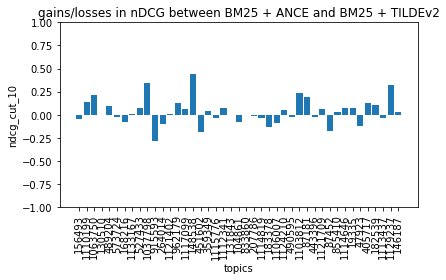

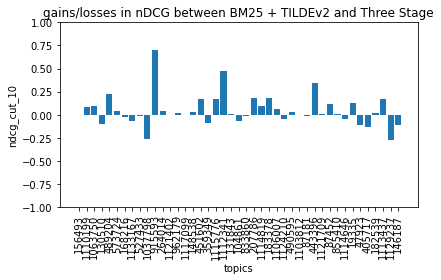

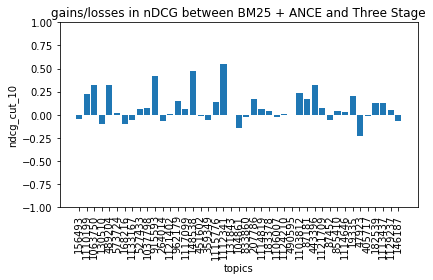

In [174]:
measure = "ndcg_cut_10"

title = "gains/losses in nDCG between BM25 + ANCE and BM25 + TILDEv2"

r = dict([(key, value[measure]) for key, value in ance_100_results.items()])

r1 = dict([(key, value[measure]) for key, value in ance_100_results.items()])
r2 = dict([(key, value[measure]) for key, value in tildev_500_results.items()])
ind = np.arange(len(r1))
# https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/barchart.html
plt.bar(ind, np.subtract(list(r2.values()), list(r1.values())))
plt.xticks(ind, list(r.keys()), rotation="vertical")
plt.ylim(-1, 1)
plt.title(title)
plt.ylabel(measure)
plt.xlabel("topics")
plt.tight_layout()
plt.show()


title = "gains/losses in nDCG between BM25 + TILDEv2 and Three Stage"

r = dict([(key, value[measure]) for key, value in tildev_500_results.items()])

r1 = dict([(key, value[measure]) for key, value in tildev_500_results.items()])
r2 = dict([(key, value[measure]) for key, value in mono_100_results.items()])
ind = np.arange(len(r1))
# https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/barchart.html
plt.bar(ind, np.subtract(list(r2.values()), list(r1.values())))
plt.xticks(ind, list(r.keys()), rotation="vertical")
plt.ylim(-1, 1)
plt.title(title)
plt.ylabel(measure)
plt.xlabel("topics")
plt.tight_layout()
plt.show()

title = "gains/losses in nDCG between BM25 + ANCE and Three Stage"

r = dict([(key, value[measure]) for key, value in ance_100_results.items()])

r1 = dict([(key, value[measure]) for key, value in ance_100_results.items()])
r2 = dict([(key, value[measure]) for key, value in mono_100_results.items()])
ind = np.arange(len(r1))
# https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/barchart.html
plt.bar(ind, np.subtract(list(r2.values()), list(r1.values())))
plt.xticks(ind, list(r.keys()), rotation="vertical")
plt.ylim(-1, 1)
plt.title(title)
plt.ylabel(measure)
plt.xlabel("topics")
plt.tight_layout()
plt.show()

From the graphs above, we can observe that BM25 + TILDEv2 and three stage model have more gain when compare to the BM25 + ANCE. So, the worst model among these three is BM25 + ANCE model.

From the second graph, we can observe that three stage model have more gains when compare to BM25 + TILDEv2. Thus, the best model among three is the three stage model.

Model ranking based on Gain Loss:
three stage > BM25 + TILDEv2 > BM25 + ANCE

### Perform on test set

Since the above result shows the three stage model is the best model, I will apply model to the test set to further evaluate the performance of the model.

In [175]:
test_queries = []
with open("test_queries.tsv", "r") as f:
    for line in f.readlines():
        parts = line.split("\t")
        # parts[0] ~> topic id
        # parts[1] ~> query
        test_queries.append((parts[0], parts[1].strip()))
        
def search(weights_file,run_file: str, k: int=10, m: int=10):
    # Get bm25 ranking and Score with Tildev2
    bm25_rank_lst = []
    for topic_id, query in tqdm(test_queries):
        hits = searcher.search(query,k=k)
        topic_lst = []
        for i, hit in enumerate(hits):
            record_lst = []
            record_lst.append(topic_id)
            record_lst.append(query)
            record_lst.append(hit.docid)
            content = hits[i].raw
            record_lst.append(content)
            record_lst.append(i+1)
            score = tildev2_scoreing(query,hits[i].raw,weights_file,int(hit.docid))
            record_lst.append(score)
            topic_lst.append(record_lst)
        bm25_rank_lst.append(topic_lst)
    
    # Re-rank by Tildev score
    df_lst = []
    for i in tqdm(bm25_rank_lst):
        df = pd.DataFrame(i,columns=['topic_id','query','docid','doc_content','bm25_rank','tildev_score'])
        df.sort_values(by = ['tildev_score'],axis=0,ascending=False, inplace=True)
        df.reset_index(drop=True,inplace=True)
        df['tildev_rank'] = df.index
        df = df.iloc[:m]
        df_lst.append(df)
    print('Tildev2 Re-rank Done!')
    
    # Process data for monoBERT
    tildev_rank_lst = []
    for i in tqdm(range(len(df_lst))):
        query_df = df_lst[i][['topic_id','query']]
        query_df.drop_duplicates(inplace=True)
        doc_df = df_lst[i][['docid','doc_content']]
        #print(len(query_df),len(doc_df))
        
        # Score with monoBERT
        for topic_id, query in query_df.values:
            topic_lst = []
            rank = 0
            for docid, content in doc_df.values:
                #print('Topic:',query , 'Doc:', docid)
                record_lst = []
                record_lst.append(topic_id)
                record_lst.append(docid)
                record_lst.append(rank+1)
                score = monoBERT_score(query, content)
                record_lst.append(score)
                topic_lst.append(record_lst)
                rank += 1
            tildev_rank_lst.append(topic_lst)
    
    # Re-rank by BERT score
    df_lst = []
    for i in tqdm(tildev_rank_lst):
        df = pd.DataFrame(i,columns=['topic_id','docid','tildev2_rank','bert_score'])
        df.sort_values(by = ['bert_score'],axis=0,ascending=False, inplace=True)
        df.reset_index(drop=True,inplace=True)
        df['bert_rank'] = df.index
        df_lst.append(df)
    
    overall_df = pd.concat(df_lst)
    overall_df = overall_df[['topic_id','docid','bert_rank','bert_score']]
    
    # Write the BERT re-rank list to run
    with open(run_file, "w") as f:
        for topic_id,docid,bert_rank,bert_score in tqdm(overall_df.values):
            # Write the results to our file.
            f.write(f"{topic_id} Q0 {docid} {bert_rank} {bert_score} infs7410_pj2\n")

In [176]:
search(weights_file,"pj2_k1000_tildev_m100_bert_test.run",k=1000,m=100)

100%|██████████████████████████████████████████| 54/54 [00:00<00:00, 475.19it/s]


Tildev2 Re-rank Done!


100%|███████████████████████████████████| 5400/5400 [00:00<00:00, 540980.76it/s]


### BM25 + TILDev2

In [177]:
def search(weights_file,run_file: str, k: int=10):
    # Get bm25 ranking and Score with Tildev2
    bm25_rank_lst = []
    for topic_id, query in tqdm(test_queries):
        hits = searcher.search(query,k=k)
        topic_lst = []
        for i, hit in enumerate(hits):
            record_lst = []
            record_lst.append(topic_id)
            record_lst.append(hit.docid)
            record_lst.append(i+1)
            score = tildev2_scoreing(query,hits[i].raw,weights_file,int(hit.docid))
            record_lst.append(score)
            topic_lst.append(record_lst)
        bm25_rank_lst.append(topic_lst)
    
    # Re-rank by Tildev score
    df_lst = []
    for i in tqdm(bm25_rank_lst):
        df = pd.DataFrame(i,columns=['topic_id','docid','bm25_rank','tildev_score'])
        df.sort_values(by = ['tildev_score'],axis=0,ascending=False, inplace=True)
        df.reset_index(drop=True,inplace=True)
        df['tildev_rank'] = df.index
        df_lst.append(df)
    
    overall_df = pd.concat(df_lst)
    overall_df = overall_df[['topic_id','docid','tildev_rank','tildev_score']]
    
    # Write the Tildev re-rank list to run
    with open(run_file, "w") as f:
        for topic_id,docid,tildev_rank,tildev_score in tqdm(overall_df.values):
            # Write the results to our file.
            f.write(f"{topic_id} Q0 {docid} {tildev_rank} {tildev_score} infs7410_pj2_tildev2\n")

search(weights_file,"pj2_k500_tildev_test.run",k=500)

100%|█████████████████████████████████| 27000/27000 [00:00<00:00, 696304.13it/s]


### BM25 + ANCE

In [178]:
def search(run_file: str, k: int=10):
    # Get bm25 ranking and Score with ANCE
    bm25_rank_lst = []
    for topic_id, query in tqdm(test_queries):
        hits = searcher.search(query,k=k)
        topic_lst = []
        for i, hit in enumerate(hits):
            record_lst = []
            record_lst.append(topic_id)
            record_lst.append(hit.docid)
            record_lst.append(i+1)
            query_embed = ance_encode(query)
            document_embed = ance_encode(hits[i].raw)
            score = np.dot(query_embed,document_embed)
            record_lst.append(score)
            topic_lst.append(record_lst)
        bm25_rank_lst.append(topic_lst)
    
    # Re-rank by ANCE score
    df_lst = []
    for i in tqdm(bm25_rank_lst):
        df = pd.DataFrame(i,columns=['topic_id','docid','bm25_rank','ance_score'])
        df.sort_values(by = ['ance_score'],axis=0,ascending=False, inplace=True)
        df.reset_index(drop=True,inplace=True)
        df['ance_rank'] = df.index
        df_lst.append(df)
    
    overall_df = pd.concat(df_lst)
    overall_df = overall_df[['topic_id','docid','ance_rank','ance_score']]
    
    # Write the ANCE re-rank list to run
    with open(run_file, "w") as f:
        for topic_id,docid,ance_rank,ance_score in tqdm(overall_df.values):
            # Write the results to our file.
            f.write(f"{topic_id} Q0 {docid} {ance_rank} {ance_score} infs7410_pj2_ance\n")

search("pj2_k100_ance_test.run",k=100)

100%|███████████████████████████████████| 5400/5400 [00:00<00:00, 543538.32it/s]


### Performance of 3 stage pipeline

|                      | MAP    | nDCG   | Recall | Reciprocal Rank |
|----------------------|--------|--------|--------|-----------------|
| Training performance | 0.3882 | 0.7191 | 0.4735 | 0.9690          |
| Test performance     | 0.4551 | 0.7196 | 0.659  | 0.8549          |


From the table, we can observe that the model perform quite consistent on training and test data.

### Performance of BM25 + TLIDEv2

|                      | MAP    | nDCG   | Recall | Reciprocal Rank |
|----------------------|--------|--------|--------|-----------------|
| Training performance | 0.4226 | 0.6713 | 0.6275 |          0.9380 |
| Test performance     | 0.3996 | 0.7947 | 0.6497 | 0.6857          |

From the table above, we can observe that the model is better in some of the measures while worse in other measures. So, I think it is quite consistent performance on both training and test set

### Performance of BM25 + ANCE

|                      | MAP    | nDCG   | Recall | Reciprocal Rank |
|----------------------|--------|--------|--------|-----------------|
| Training performance | 0.3209 | 0.6379 | 0.4369 |          0.8844 |
| Test performance     | 0.3073 | 0.7206 | 0.5702 | 0.5231          |

From the table above, we can observe that the model is better in some of the measures while worse in other measures. So, I think it is quite consistent performance on both training and test set

## Findings

I have observed that recall and nDCG increase for all three models with the test set but the reciprocal rank vice versa. Mean average precision increase for the three stage model while it decrease for the other two models. 

Besides, from the measures of the test set, 3 stage pipeline outperform the other 2 models in 3 out of 4 measures.